<h2>훈련 세트와 테스트 세트</h2>
모델의 정확도를 더 분명히 파악하기 위해서는 훈련 데이터와 테스트 데이터를 구분하는 게 좋다.

In [3]:
#sklearn 임포트
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()


#생선의 무게와 길이를 담은 리스트 2개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#두 개의 리스트를 하나의 2차원 리스트로 만들기
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

#처음 35개의 샘플을 훈련 세트, 뒤의 14개 샘플을 테스트 세트로 활용할 것임.

#훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
#훈련 세트로 타깃값 중 0부터 34번재 인덱스까지 사용
train_target = fish_target[:35]
#테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
#테스트 세트로 타깃값 중 35번재부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

#훈련 후 평가
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#정확도가 0인 이유? : 샘플링이 한쪽으로 치우쳤기 때문.(빙어가 하나도 없음.) => 샘플링 편향!

0.0

<h3>넘파이

In [5]:
import numpy as np

#파이썬 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#shape 속성 : 배열의 크기를 알려줌
print(input_arr.shape)

#(49, 2) = 49개의 샘플과 2개의 특성

(49, 2)


샘플들 랜덤으로 섞기

In [10]:
np.random.seed(42)
index = np.arange(49)    #arrange : 0에서 48까지 1씩 증가하는 인덱스 생성 함수
np.random.shuffle(index) #shuffle : 주어진 배열을 무작위로 섞는 함수

#랜덤하게 섞인 인덱스 배열을 input_arr와 target_arr에 전달
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[:35]]
test_target = target_arr[index[:35]]

[ 32. 340.] [ 32. 340.]


데이터가 잘 섞였는지 산점도로 확인

TypeError: list indices must be integers or slices, not tuple

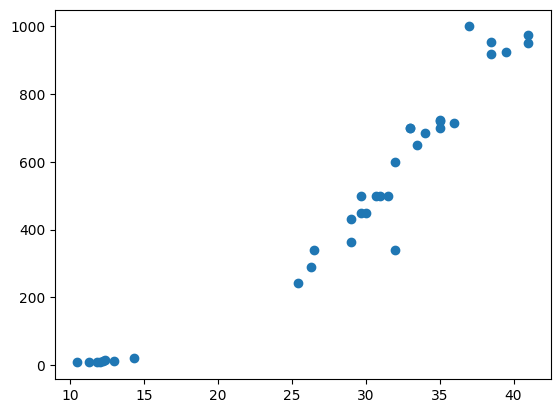

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃 모델 훈련

In [13]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.predict(test_input) #뭔가 잘못된 것 같은데 너무 귀찮으니까 그냥 넘길래.. 튜플 형식 문제가 어디 있는 것 같음.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])